<a href="https://colab.research.google.com/github/Yuvan2508/myportfolio/blob/main/Yuvan_CNN_fruit360.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import kagglehub

# Download selected version
path = kagglehub.dataset_download("moltean/fruits/versions/11")

print("Path to dataset files:", path)

100%|██████████| 964M/964M [00:09<00:00, 112MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/moltean/fruits/versions/11


In [2]:
!cp -r /root/.cache/kagglehub/datasets/moltean/fruits/versions/11 /content/fruits_dataset


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow
import glob as glob
import seaborn as sns
from tensorflow.keras.preprocessing.image import load_img ,img_to_array

In [4]:
train_path='/content/fruits_dataset/fruits-360_dataset_100x100/fruits-360/Training'
test_path='/content/fruits_dataset/fruits-360_dataset_100x100/fruits-360/Test'

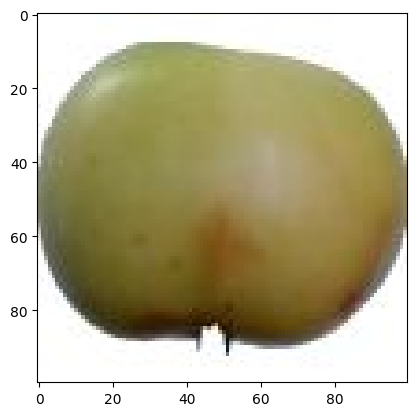

In [5]:
x=load_img('/content/fruits_dataset/fruits-360_dataset_100x100/fruits-360/Training/Apple 6/r0_100_100.jpg')
plt.imshow(x)
plt.show()

In [6]:
img=img_to_array(x)
img.shape

(100, 100, 3)

In [7]:
classname=glob.glob(train_path+'/*')
noc=len(classname)
print(noc)

141


In [8]:
import tensorflow
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.layers import Input,Dense,Conv2D,MaxPooling2D,Flatten,Activation,Dropout,BatchNormalization,Add
from tensorflow.keras.optimizers import Adam,RMSprop
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [9]:
model1=Sequential()

model1.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu',padding='same',input_shape=(img.shape)))
model1.add(MaxPooling2D(pool_size=(2,2)))
model1.add(Dropout(0.10))

model1.add(Conv2D(128,(3,3),activation='relu',padding='same'))
model1.add(MaxPooling2D(2,2))
model1.add(Dropout(0.10))

model1.add(Conv2D(256,(3,3),activation='relu',padding='same'))
model1.add(MaxPooling2D(2,2))
model1.add(Dropout(0.10))

model1.add(Conv2D(256,(3,3),activation='relu',padding='same'))
model1.add(MaxPooling2D(2,2))
model1.add(Dropout(0.10))

model1.add(Flatten())
model1.add(Dense(512,activation='relu'))
model1.add(Dropout(0.10))
model1.add(Dense(512,activation='relu'))
model1.add(Dense(noc,activation='softmax'))

model1.compile(optimizer=Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])
model1.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 100, 100, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 50, 50, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 50, 50, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 50, 50, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 25, 25, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 25, 25, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 25, 25, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 12, 12, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 12, 12, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     4,719,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 141)            │        72,333 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,014,989 (22.95 MB)

 Trainable params: 6,014,989 (22.95 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
train_datagen=ImageDataGenerator(
    rescale=1./255.0,
    horizontal_flip=True,
    vertical_flip=True,
    shear_range=0.2,
    zoom_range=0.2,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    fill_mode='nearest'
)
test_datagen=ImageDataGenerator(
    rescale=1./255.0)

In [11]:
train_generator=train_datagen.flow_from_directory(
    train_path,
    target_size=(100,100),
    color_mode='rgb',
    batch_size=32,
    shuffle=True,
    class_mode='categorical'
)
test_generator=test_datagen.flow_from_directory(
    test_path,
    target_size=img.shape[:2],
    color_mode='rgb',
    batch_size=32,
    shuffle=True,
    class_mode='categorical'
)

Found 70491 images belonging to 141 classes.
Found 23619 images belonging to 141 classes.


In [12]:
batch_size=32
history1=model1.fit(
    train_generator,
    epochs=50,
    steps_per_epoch=1600//batch_size,
    validation_data=test_generator,
    validation_steps=800//batch_size
)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 18s 149ms/step - accuracy: 0.0052 - loss: 4.9514 - val_accuracy: 0.0125 - val_loss: 4.9322
Epoch 2/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 7s 134ms/step - accuracy: 0.0127 - loss: 4.9290 - val_accuracy: 0.0063 - val_loss: 4.8797
Epoch 3/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 10s 205ms/step - accuracy: 0.0173 - loss: 4.7905 - val_accuracy: 0.0487 - val_loss: 4.4888
Epoch 4/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 6s 117ms/step - accuracy: 0.0463 - loss: 4.4265 - val_accuracy: 0.0712 - val_loss: 3.9304
Epoch 5/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 6s 112ms/step - accuracy: 0.0733 - loss: 3.8502 - val_accuracy: 0.1213 - val_loss: 3.5331
Epoch 6/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 6s 129ms/step - accuracy: 0.1009 - loss: 3.5138 - val_accuracy: 0.1013 - val_loss: 3.3165
Epoch 7/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 5s 109ms/step - accuracy: 0.1075 - loss: 3.3694 - val_accuracy: 0.1562 - val_loss: 3.1577
Epoch 8/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 6s 129ms/step - accuracy: 0.1336 - loss: 3.2179 - val_accuracy: 

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.6559 - loss: 0.9606 - val_accuracy: 0.7375 - val_loss: 0.7946
Epoch 46/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 6s 124ms/step - accuracy: 0.7649 - loss: 0.6813 - val_accuracy: 0.7738 - val_loss: 0.7311
Epoch 47/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 6s 112ms/step - accuracy: 0.7340 - loss: 0.7556 - val_accuracy: 0.7812 - val_loss: 0.7127
Epoch 48/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 6s 125ms/step - accuracy: 0.7556 - loss: 0.7212 - val_accuracy: 0.8075 - val_loss: 0.6117
Epoch 49/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 5s 107ms/step - accuracy: 0.7684 - loss: 0.7090 - val_accuracy: 0.7987 - val_loss: 0.6706
Epoch 50/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 6s 126ms/step - accuracy: 0.7795 - loss: 0.6828 - val_accuracy: 0.8050 - val_loss: 0.6081


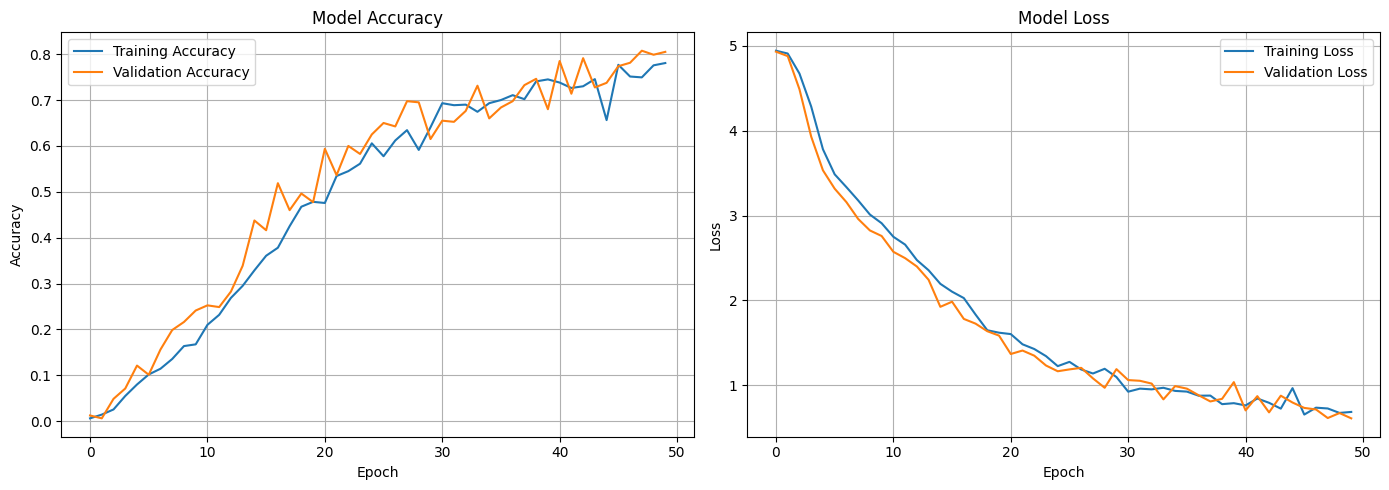

In [13]:
import matplotlib.pyplot as plt

# Training and validation accuracy
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history1.history['accuracy'], label='Training Accuracy')
plt.plot(history1.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history1.history['loss'], label='Training Loss')
plt.plot(history1.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()
